In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install wordcloud

In [3]:
filename='wealth_management_10000_tokenized.csv'

data=pd.read_csv(filename,index_col=0)

In [4]:
data.shape

(4392, 12)

In [6]:
def word_cloud(vocab):
    dict_={}
    for key,feq in vocab.items():
        dict_[key]=int(feq)
    plt.figure(figsize=(20,20))
    wordcloud = WordCloud(max_font_size=40, max_words=500,background_color="white").generate_from_frequencies(dict_)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

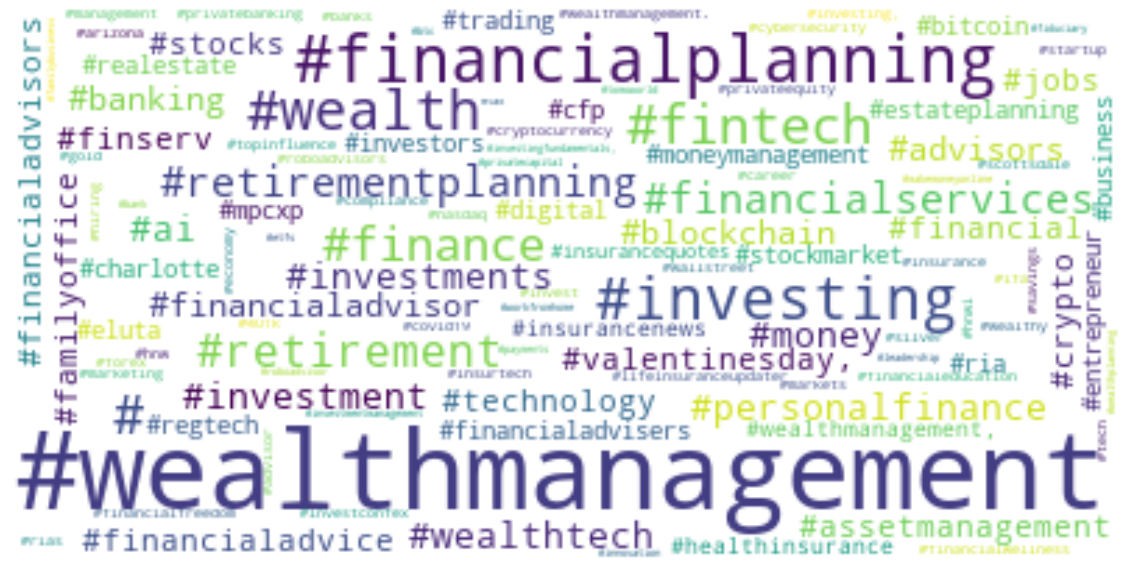

In [7]:
text = data['cleaned_text']

te = text.str.cat(sep=' ').lower()

from collections import Counter
c = Counter(te.split(" "))
d = {k: v for (k,v) in c.items() if k.startswith("#")}
word_cloud(d)

In [8]:
# delete useless hashtags
d["#"] = 0
d["#wealthmanagement"] = 0

# order by frequency
de = sorted(d.items(), key=lambda pair: pair[1], reverse=True)
ded = {k:v for (k,v) in de}

In [9]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# take top 20 words
td = {k:v for (k,v) in take(20, ded.items())}

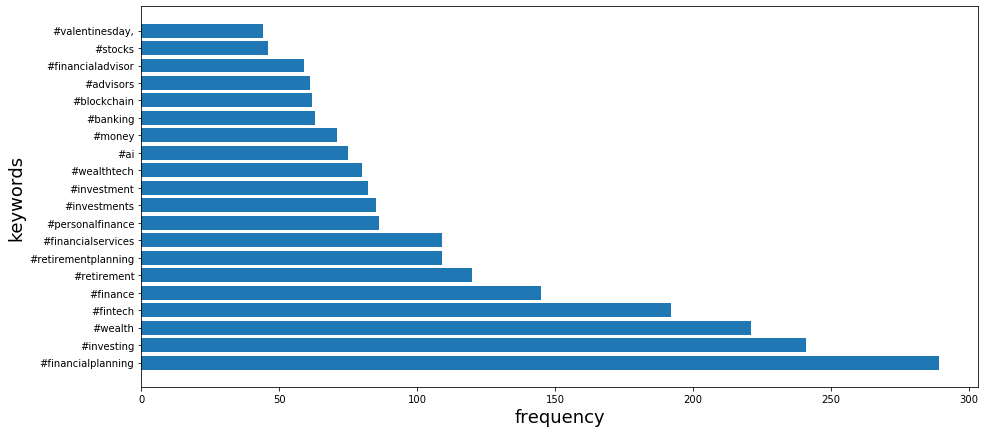

In [10]:
plt.figure(figsize=(15,7))
plt.barh(range(20), td.values(), align='center')
plt.yticks(range(20), td.keys())
plt.xlabel('frequency', fontsize=18)
plt.ylabel('keywords', fontsize=18)

plt.show()